In [1]:
import pandas as pd
import numpy as np
import scipy as stats
import seaborn as sns
import matplotlib as plot
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import acquire
import warnings
warnings.filterwarnings("ignore")
import explore

# In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = data('iris')


### print the first 3 rows


In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

### print the column names

In [5]:
list(df_iris.columns.values)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

### print the data type of each column

In [6]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

### print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [8]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx')

## assign the first 100 rows to a new dataframe, df_excel_sample

In [9]:
df_excel_sample = pd.read_excel('Spreadsheets_Exercises.xlsx', nrows=100)

## print the number of rows of your original dataframe

In [10]:
len(df_excel)

7049

### print the first 5 column names

In [11]:
list(df_excel.columns.values)[0:5]

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

### print the column names that have a data type of object


In [12]:
list(df_excel.select_dtypes(['object']).columns)


['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

## compute the range for each of the numeric variables.

In [13]:
r = df_excel.select_dtypes(include=[np.number])

In [14]:
r = r.drop('Unnamed: 12', axis = 1)

In [15]:
r = r.drop('Unnamed: 13', axis = 1)

In [16]:
R = r.max()-r.min()

In [17]:
R

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

# Read the data from this google sheet into a dataframe, df_google

In [18]:
google_url = "https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357"
csv_export_url = google_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_googlesheet = pd.read_csv(csv_export_url)


### print the first 3 rows

In [19]:
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### print the number of rows and columns


In [20]:
df_googlesheet.shape

(891, 12)

### print the column names


In [21]:
list(df_googlesheet.columns.values)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### print the data type of each column


In [22]:
df_googlesheet.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### print the summary statistics for each of the numeric variables


In [23]:
df_googlesheet.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### print the unique values for each of your categorical variables


In [24]:
df_googlesheet['Survived'].unique()

array([0, 1])

In [25]:
df_googlesheet['Sex'].unique()

array(['male', 'female'], dtype=object)

In [26]:
df_googlesheet['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
cat_df = df_googlesheet.drop(columns=['PassengerId',
 'Pclass',
 'Name',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',])

In [28]:
cat_df.value_counts()

Survived  Sex     Embarked
0         male    S           364
1         female  S           140
          male    S            77
0         male    C            66
1         female  C            64
0         female  S            63
          male    Q            38
1         male    C            29
          female  Q            27
0         female  C             9
                  Q             9
1         male    Q             3
dtype: int64

In [29]:
df_googlesheet

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
import acquire


In [31]:
iris = acquire.get_iris_data()

In [32]:
iris.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,0,5.1,3.5,1.4,0.2,1,setosa
1,1,4.9,3.0,1.4,0.2,1,setosa
2,2,4.7,3.2,1.3,0.2,1,setosa
3,3,4.6,3.1,1.5,0.2,1,setosa
4,4,5.0,3.6,1.4,0.2,1,setosa


In [33]:
iris = iris.drop(['Unnamed: 0','species_id'], axis= 1)

In [34]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
iris = iris.rename(columns={"species_name": "species"})

In [36]:
dummy_df = pd.get_dummies(iris[['species']], dummy_na=False, drop_first=[True])

In [37]:
dummy_df.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [38]:
iris = pd.concat([iris, dummy_df], axis=1)

In [39]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [40]:
iris = acquire.get_iris_data()

In [41]:
def prep_iris_data(iris):
    '''
   
    '''
    iris = iris.drop(['Unnamed: 0','species_id'], axis= 1)
    iris = iris.rename(columns={"species_name": "species"})
    dummy_df = pd.get_dummies(iris[['species']], dummy_na=False, drop_first=[True])
    iris = pd.concat([iris, dummy_df], axis=1)
    return iris

In [42]:
iris_df = prep_iris_data(iris)

In [43]:
def split_data(iris_df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(iris_df, test_size=.2, random_state=123, stratify=iris_df.species)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.species)
    return train, validate, test

In [44]:
train, validate, test = split_data(iris_df)

## Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

- Acquire, prepare & split your data.

In [45]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,1,0
36,5.5,3.5,1.3,0.2,setosa,0,0
133,6.3,2.8,5.1,1.5,virginica,0,1
95,5.7,3.0,4.2,1.2,versicolor,1,0
18,5.7,3.8,1.7,0.3,setosa,0,0


In [46]:
test.shape

(30, 7)

In [47]:
validate.shape

(36, 7)

## Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [58]:
cat_vars = ['species']
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

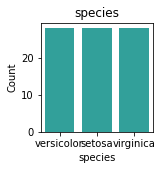

               species  Count  Percent
setosa      versicolor     28    33.33
versicolor      setosa     28    33.33
virginica    virginica     28    33.33
_________________________________________________________________


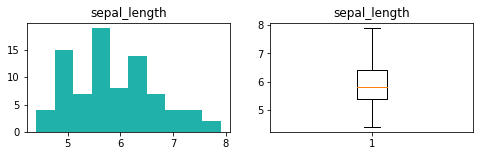

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


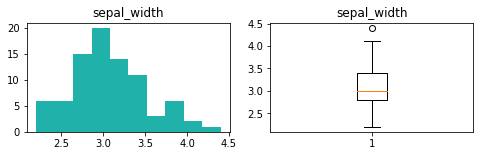

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


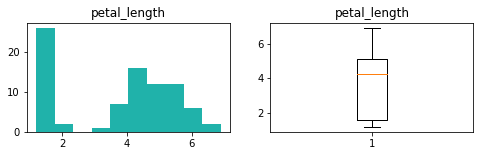

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


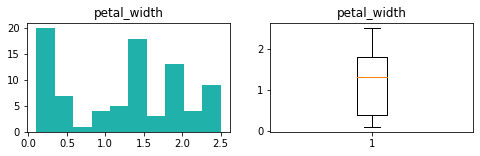

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [49]:
explore.explore_univariate(train, cat_vars, quant_vars)

## Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

In [50]:
cat_vars = cat_vars[1:]

sepal_length 
____________________



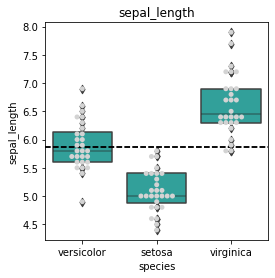

            count      mean       std  min    25%   50%    75%  max
species                                                            
setosa       28.0  5.089286  0.360390  4.4  4.875  5.00  5.400  5.8
versicolor   28.0  5.896429  0.425556  4.9  5.600  5.80  6.125  6.9
virginica    28.0  6.625000  0.532378  5.8  6.300  6.45  6.900  7.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

sepal_width 
____________________



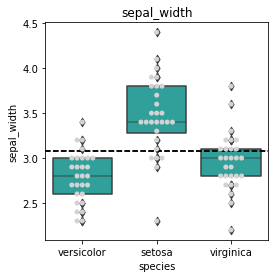

            count      mean       std  min    25%  50%  75%  max
species                                                         
setosa       28.0  3.467857  0.427788  2.3  3.275  3.4  3.8  4.4
versicolor   28.0  2.796429  0.280848  2.3  2.600  2.8  3.0  3.4
virginica    28.0  2.960714  0.318956  2.2  2.800  3.0  3.1  3.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

petal_length 
____________________



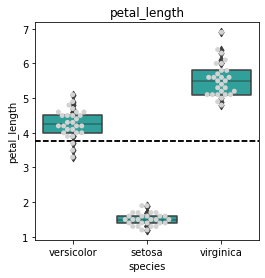

            count      mean       std  min  25%   50%    75%  max
species                                                          
setosa       28.0  1.507143  0.184448  1.2  1.4  1.50  1.600  1.9
versicolor   28.0  4.271429  0.409930  3.3  4.0  4.25  4.525  5.1
virginica    28.0  5.535714  0.496815  4.8  5.1  5.50  5.800  6.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

petal_width 
____________________



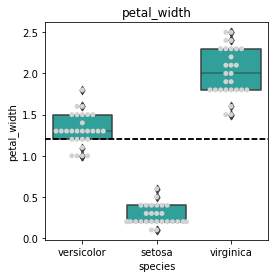

            count      mean       std  min  25%  50%  75%  max
species                                                       
setosa       28.0  0.275000  0.120570  0.1  0.2  0.2  0.4  0.6
versicolor   28.0  1.314286  0.199470  1.0  1.2  1.3  1.5  1.8
virginica    28.0  2.021429  0.293582  1.5  1.8  2.0  2.3  2.5 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________



In [51]:
explore.explore_bivariate(train, 'species',cat_vars, quant_vars)

## Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

In [52]:
target= 'species'

petal_length 
____________________



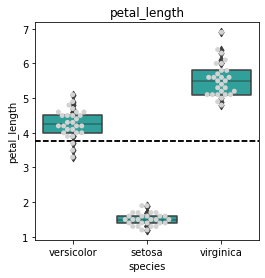

            count      mean       std  min  25%   50%    75%  max
species                                                          
setosa       28.0  1.507143  0.184448  1.2  1.4  1.50  1.600  1.9
versicolor   28.0  4.271429  0.409930  3.3  4.0  4.25  4.525  5.1
virginica    28.0  5.535714  0.496815  4.8  5.1  5.50  5.800  6.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________



In [53]:
explore.explore_bivariate_quant(train, target, 'petal_length')

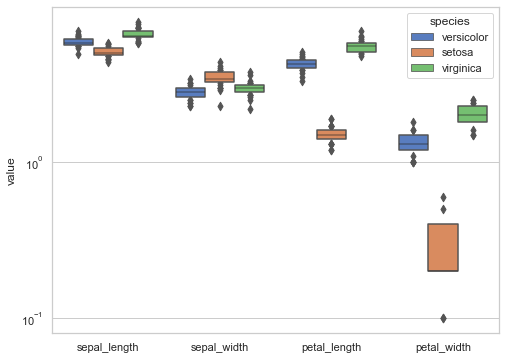

In [54]:
explore.plot_all_continuous_vars(train, target, quant_vars)

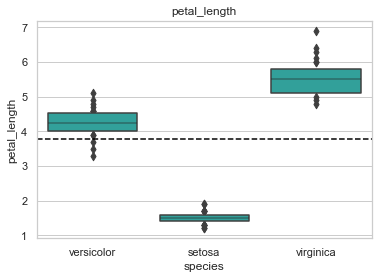

In [55]:
explore.plot_boxen(train, target, 'petal_length')

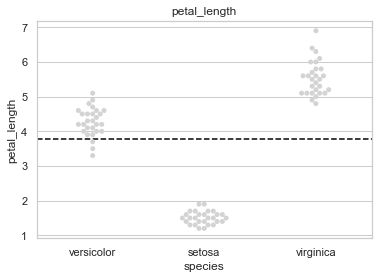

In [56]:
explore.plot_swarm(train, target, 'petal_length')

TypeError: 'AxesSubplot' object is not subscriptable

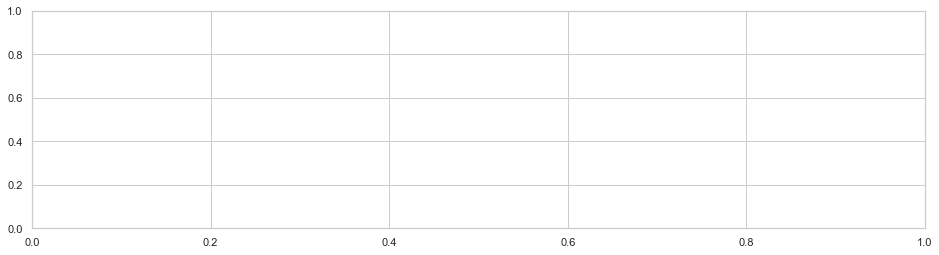

In [71]:

target = ['petal_width']
explore.explore_multivariate(train, target, cat_vars, quant_vars)

In [70]:
cat_vars=['species']